What do you want to analyse?    
    0	Show a demo function of the program.
    1	How has the total avoided use of fossil energy due to wind energy changed over the period 2010-2018?
	What part of this avoided use of fossil energy can be assigned to wind power on land and wind power at sea?
    2	How much has the avoidance of CO2 emission in the Netherlands changed in the period 1990 to 2018?    
    3	What is the difference in usage of wood in a household regarding a freestanding wooden stove and a freestanding pallet stove?    
    4	Which energy source was the most efficient in 2018 in terms of producing energy with the highest prevention of CO2 emission?    
    5	Exit the program.

    1

What do you want to do?
    1	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the total wind power.
    2	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the total wind power.
    3	Make a bar graph of the total 'absolutely' avoided us

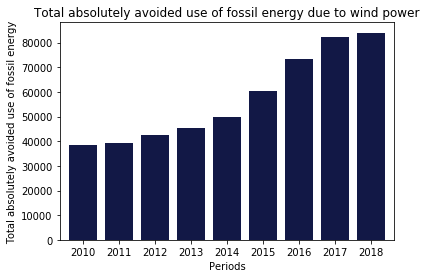


What do you want to do?
    1	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the total wind power.
    2	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the total wind power.
    3	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    4	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    5	Exit the menu.

    2


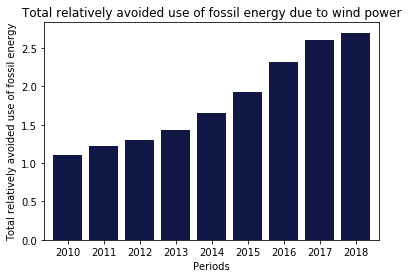


What do you want to do?
    1	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the total wind power.
    2	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the total wind power.
    3	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    4	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    5	Exit the menu.

    3


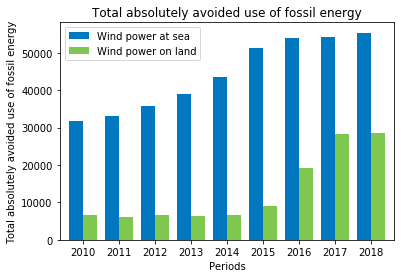


What do you want to do?
    1	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the total wind power.
    2	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the total wind power.
    3	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    4	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    5	Exit the menu.

    4


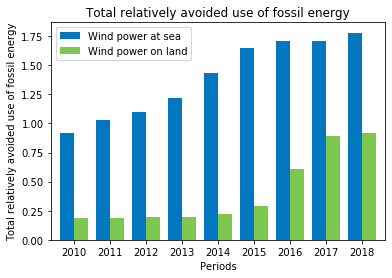


What do you want to do?
    1	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the total wind power.
    2	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the total wind power.
    3	Make a bar graph of the total 'absolutely' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    4	Make a bar graph of the total 'relatively' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    5	Exit the menu.

    5
Thank you.
What do you want to analyse?    
    0	Show a demo function of the program.
    1	How has the total avoided use of fossil energy due to wind energy changed over the period 2010-2018?
	What part of this avoided use of fossil energy can be assigned to wind power on land and wind power at sea?
    2	How much has the avoidance of CO2 emission in the Netherlands changed in the period 1990 to 2018?    
    3	What is the difference in usage of woo

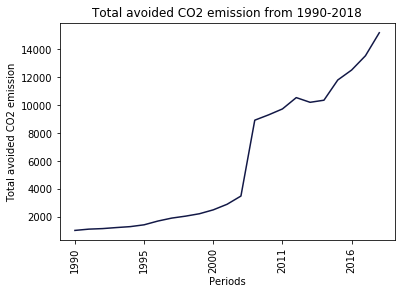

What do you want to analyse?    
    0	Show a demo function of the program.
    1	How has the total avoided use of fossil energy due to wind energy changed over the period 2010-2018?
	What part of this avoided use of fossil energy can be assigned to wind power on land and wind power at sea?
    2	How much has the avoidance of CO2 emission in the Netherlands changed in the period 1990 to 2018?    
    3	What is the difference in usage of wood in a household regarding a freestanding wooden stove and a freestanding pallet stove?    
    4	Which energy source was the most efficient in 2018 in terms of producing energy with the highest prevention of CO2 emission?    
    5	Exit the program.

    3


In [ ]:
# main program file

# import the necessary modules
import demo
import data_handling as dh
import wind_power as wp
import change_emission as ce
import RQ3_Stoves as st
import Energy_efficiency as ee
import matplotlib.pyplot as plt
import pandas as pd

# path to file
cbsdata = "../data/raw/raw_data_renewable_energy.csv"

# load CBS data set
try:
    dataset = dh.load_data(cbsdata)
except Exception as err:
    print("Something went wrong...")
    print(err)

# create a loop for the entire program, which runs until option 5 is selected.
while True:
    # print options
    choice = input("""What do you want to analyse?    
    0\tShow a demo function of the program.
    1\tHow has the total avoided use of fossil energy due to wind energy changed over the period 2010-2018?\n\tWhat part of this avoided use of fossil energy can be assigned to wind power on land and wind power at sea?
    2\tHow much has the avoidance of CO2 emission in the Netherlands changed in the period 1990 to 2018?    
    3\tWhat is the difference in usage of wood in a household regarding a freestanding wooden stove and a freestanding pallet stove?    
    4\tWhich energy source was the most efficient in 2018 in terms of producing energy with the highest prevention of CO2 emission?    
    5\tExit the program.\n
    """)

# evaluate user choice and proceed accordingly
    # demo chart
    if choice == "0":
        print("Create demo bar chart: total avoided use of fossil energy due to wind power over the period 2010-2018.")

        # call function to make bar chart
        barplot = demo.wind_energy_plot(dataset)

        # make python show the plot
        plt.show()

    # research question 1
    elif choice == "1":
        while True:
            user_choice = input("""\nWhat do you want to do?
    1\tMake a bar graph of the total 'absolutely' avoided use of fossil energy due to the total wind power.
    2\tMake a bar graph of the total 'relatively' avoided use of fossil energy due to the total wind power.
    3\tMake a bar graph of the total 'absolutely' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    4\tMake a bar graph of the total 'relatively' avoided use of fossil energy due to the wind power, with subdivisions on land and at sea.
    5\tExit the menu.\n
    """)
            # make a bar graph absolute
            if user_choice == "1":
                dataframe = wp.get_subset_dataframe_total(dataset)
                graph = wp.bar_graph_total(dataframe)
                # saves the graph to a png file inside of results
                plt.savefig("../results/output/bargraph_1_1.png")

                # shows the graph
                plt.show()

            # make a bar graph relative
            elif user_choice == "2":
                dataframe = wp.get_subset_dataframe_total(dataset, 1)
                graph = wp.bar_graph_total(dataframe, 1)
                # saves the graph to a png file inside of results
                plt.savefig("../results/output/bargraph_1_2.png")

                # shows the graph
                plt.show()

            # make a bar graph absolute divided
            elif user_choice == "3":
                dataframe = wp.get_subset_dataframe_parts(dataset)
                graph = wp.wind_energy_plot(dataframe)
                # saves the graph to a png file inside of results
                plt.savefig("../results/output/bargraph_1_3.png")

                # shows the graph
                plt.show()

            # make a bar graph relative divided
            elif user_choice == "4":
                dataframe = wp.get_subset_dataframe_parts(dataset, 1)
                graph = wp.wind_energy_plot(dataframe, 1)
                # saves the graph to a png file inside of results
                plt.savefig("../results/output/bargraph_1_4.png")

                # shows the graph
                plt.show()

            # exit the program
            elif user_choice == "5":
                print("Thank you.")
                break

    # research question 2
    elif choice == "2":

        # creates a line graph of how much the emission has changed in the Netherlands
        line_graph = ce.emission_changed(dataset)
        # saves the graph to a png file inside of results
        plt.savefig("../results/output/linegraph_2.png")

        # show the line graph
        plt.show()

    # research question 3
    elif choice == "3":

        # creates a bar graph of the biomassa
        graph = st.biomassa_wood_plot(dataset)
        # saves the bar graph
        plt.savefig("../results/output/bargraph_3.png")

        # show the bar graph
        plt.show()

    # research question 4
    elif choice == "4":
        echoice = input(
            "Do you want to compare efficiency of sources (1) or see how the efficiency of energybsources have developed over the years(2)? ")
        if echoice == "1":
            # the efficiency function is connected with the barchart function
            efficient = ee.efficiency(dataset)
            barset = ee.barchart(dataset, efficient)
            # show bargraph
            plt.show()

        if echoice == "2":
            # the efficiency function is connected with the barchart function
            efficient = ee.efficiency(dataset)
            lineset = ee.linechart(dataset, efficient)
            # some additional parts of the graph are introduced
            plt.title("Efficiency over the years")
            plt.xlabel("Years")
            plt.ylabel("Efficiency")
            # show linegraph
            plt.show()

    elif choice == "5":
        print("Thank you for your participation. Bye!")
        break
    else:
        print("Choice was not recognized, or invalid input. Please try again")

